In [1]:
import pandas as pd

In [2]:
df_clientes_cadastrados = pd.read_csv("https://github.com/cmattosr/bootcampDS_mod06/raw/main/dados/clientes_cadastrados.csv")

In [3]:
df_clientes_cadastrados.shape

(438557, 18)

In [4]:
#Verificar se há clientes repetidos
df_clientes_cadastrados["ID_Cliente"].value_counts()

7045794    2
7636389    2
7046068    2
7052812    2
7742298    2
          ..
5709384    1
5727815    1
5729862    1
6780485    1
6293503    1
Name: ID_Cliente, Length: 438510, dtype: int64

In [5]:
#Há clientes repetidos neste dataframe (ID_Cliente)

#Verificar se ha linhas duplicadas (utilizamos o sum, se houver duplicatas será somado o valor 1 para cada ocorrência)
df_clientes_cadastrados.duplicated().sum()

0

In [6]:
#não há linhas duplicadas

#verificar quanto são os clientes repetidos, o keep=False contabiliza todas as ocorrências com IDs iguais, o valor default True contabiliza apenas a duplicata
df_clientes_cadastrados[df_clientes_cadastrados["ID_Cliente"].duplicated(keep=False)].shape

(94, 18)

In [7]:
#Há 94 clientes repetidos (na verdade 47 aparecem duas vezes)
#Essas linhas serão removidas pois são irrelevantes considerando o total do dataframe (94 repetidos em 438557 linhas), mas serão armazenadas separadamente
id_repetidos = df_clientes_cadastrados[df_clientes_cadastrados["ID_Cliente"].duplicated(keep=False)]["ID_Cliente"]
id_repetidos

421211    7702516
421268    7602432
421349    7602432
421464    7836971
421698    7213374
           ...   
433158    7282535
433159    7742853
433217    7135270
433666    7091721
433789    7618285
Name: ID_Cliente, Length: 94, dtype: int64

## Desafio 01: Explorar o motivo pelo qual há clientes repetidos no dataframe

In [8]:
#remover as linhas com clientes repetidos, que já estão armazenados em id_repetidos
df_clientes_cadastrados_unicos = df_clientes_cadastrados.drop(id_repetidos.index)
df_clientes_cadastrados_unicos.shape

(438463, 18)

In [9]:
#checar se ainda há clientes repetidos
df_clientes_cadastrados_unicos["ID_Cliente"].value_counts()

6291456    1
6480139    1
6486280    1
5409030    1
6463747    1
          ..
6569516    1
6690720    1
6583845    1
6575649    1
6293503    1
Name: ID_Cliente, Length: 438463, dtype: int64

In [10]:
#verificar se há valores nulos
df_clientes_cadastrados_unicos.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_Carro                0
Tem_Casa_Propria         0
Qtd_Filhos               0
Rendimento_Anual         0
Categoria_de_renda       0
Grau_Escolaridade        0
Estado_Civil             0
Moradia                  0
Idade                    0
Tem_Celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_Familia          0
Anos_empregado           0
dtype: int64

In [11]:
#não há valores nulos

#analisar o dataframe
df_clientes_cadastrados_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

# Aula 02

## Desafio 02: Explorar as colunas (features), identificar se são contínuas, categóricas ou binárias

In [12]:
colunas_quantitativas = ["Idade", "Qtd_Filhos", "Rendimento_Anual", "Tamanho_Familia", "Anos_empregado"]

In [13]:
df_clientes_cadastrados_unicos[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Tamanho_Familia,Anos_empregado
count,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,43.834032,0.427384,1.875220e+05,2.194461,-165.936036
std,11.472815,0.724879,1.100832e+05,0.897194,380.201131
min,21.000000,0.000000,2.610000e+04,1.000000,-1000.700000
25%,34.000000,0.000000,1.215000e+05,2.000000,1.000000
50%,43.000000,0.000000,1.611000e+05,2.000000,4.000000
75%,53.000000,1.000000,2.250000e+05,3.000000,8.500000
max,69.000000,19.000000,6.750000e+06,20.000000,48.000000


In [14]:
df_clientes_cadastrados_unicos.query("Anos_empregado <= 0")[["Anos_empregado", "Categoria_de_renda"]].value_counts()

Anos_empregado  Categoria_de_renda 
-1000.7         Pensionista            75314
 0.0            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64

In [15]:
#provavelmente os clientes Pensionistas foram cadastrados como Anos_empregado = -1000.7, o que está distorcendo nossa coluna Anos_empregado
#vamos substituir esses valores por um valor mais interessante que ainda deixe claro que são Pensionistas
df_clientes_cadastrados_unicos["Anos_empregado"] = df_clientes_cadastrados_unicos["Anos_empregado"].replace(-1000.7, -1)

# Tratando Outliers

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

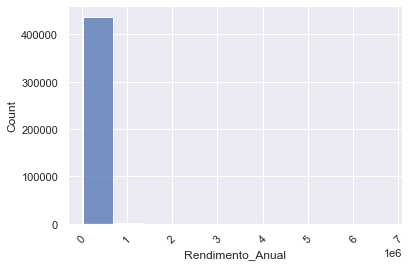

In [17]:
#verificar a distribuição dos Rendimentos Anuais no dataframe
sns.histplot(data=df_clientes_cadastrados_unicos, x="Rendimento_Anual", bins=10)
plt.xticks(rotation=45)
plt.show()

In [18]:
#essa visualização não é interessante porque os outliers estão impactando na visualização dos dados

#Vamos fazer o tratamento dos outliers

#vamos isolar a coluna de Rendimentos_Anuais
coluna = df_clientes_cadastrados_unicos["Rendimento_Anual"]

#calcular a média dos Rendimentos anuais
coluna_media = coluna.mean()
coluna_std = coluna.std()

#calcular o limite superior (média mais duas vezes o desvio padrão)
limite_sup = coluna_media + (coluna_std * 2)

#calcular o limite inferior (média menos duas vezes o desvio padrão)
limite_inf = coluna_media - (coluna_std * 2)

#verificar quais clientes ultrapassam os limites superior e inferior
index_outliers = []
for index, valor in coluna.items():
    if valor > limite_sup or valor < limite_inf:
        index_outliers.append(index)
#quantidade de clientes outliers
len (index_outliers)


#calculamos os outliers através de um intervalo de confiança, neste caso utilizamos acima ou abaixo de 2 vezes o desvio padrão

12641

## Desafio 03: Explorar outras técnicas de identificar e tratar outliers

In [19]:
#criar um dataframe sem os outliers
df_clientes_cadastrados_sem_outliers = df_clientes_cadastrados_unicos.drop(index_outliers)

In [20]:
df_clientes_cadastrados_sem_outliers.shape

(425822, 18)

In [21]:
df_clientes_cadastrados_sem_outliers[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Tamanho_Familia,Anos_empregado
count,425822.000000,425822.000000,425822.000000,425822.000000,425822.000000
mean,43.838707,0.425314,176384.728083,2.191683,5.744956
std,11.525400,0.723577,75033.530551,0.896300,6.736649
min,21.000000,0.000000,26100.000000,1.000000,-1.000000
25%,34.000000,0.000000,117000.000000,2.000000,1.000000
50%,43.000000,0.000000,157500.000000,2.000000,4.000000
75%,53.000000,1.000000,225000.000000,3.000000,8.500000
max,69.000000,19.000000,405000.000000,20.000000,48.000000


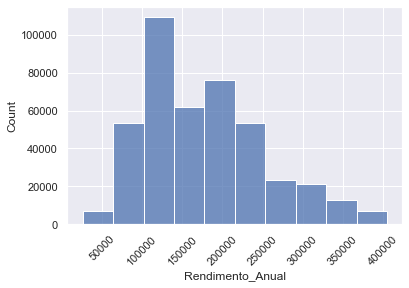

In [22]:
#verificar a distribuição dos Rendimentos Anuais no novo dataframe, sem outliers
sns.histplot(data=df_clientes_cadastrados_sem_outliers, x="Rendimento_Anual", bins=10)
plt.xticks(rotation=45)
plt.show()

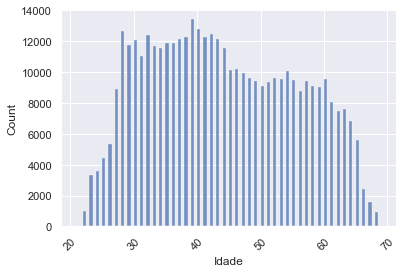

In [23]:
#verificar a distribuição da idade no novo dataframe, sem outliers
sns.histplot(data=df_clientes_cadastrados_sem_outliers, x="Idade")
plt.xticks(rotation=45)
plt.show()

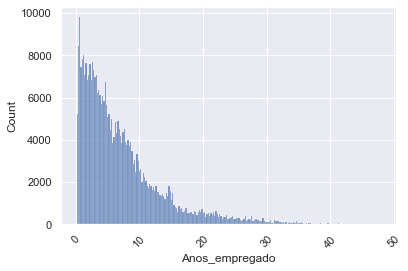

In [24]:
#verificar a distribuição dos Amnos Empregados no novo dataframe, sem outliers
sns.histplot(data=df_clientes_cadastrados_sem_outliers.query("Anos_empregado > 0"), x="Anos_empregado")
plt.xticks(rotation=45)
plt.show()

## Variáveis Categóricas

In [25]:
df_clientes_cadastrados_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425822 entries, 2 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             425822 non-null  int64  
 1   Genero                 425822 non-null  object 
 2   Tem_Carro              425822 non-null  int64  
 3   Tem_Casa_Propria       425822 non-null  int64  
 4   Qtd_Filhos             425822 non-null  int64  
 5   Rendimento_Anual       425822 non-null  float64
 6   Categoria_de_renda     425822 non-null  object 
 7   Grau_Escolaridade      425822 non-null  object 
 8   Estado_Civil           425822 non-null  object 
 9   Moradia                425822 non-null  object 
 10  Idade                  425822 non-null  float64
 11  Tem_Celular            425822 non-null  int64  
 12  Tem_telefone_trabalho  425822 non-null  int64  
 13  Tem_telefone_fixo      425822 non-null  int64  
 14  Tem_email              425822 non-nu

In [26]:
colunas_categoricas = ["Genero", "Tem_Carro", "Tem_Casa_Propria", "Categoria_de_renda", "Grau_Escolaridade", "Estado_Civil",
                       "Moradia", "Tem_Celular", "Tem_telefone_trabalho", "Tem_telefone_fixo","Tem_email", "Ocupacao"]

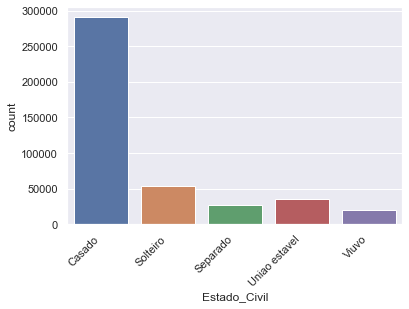

In [27]:
sns.countplot(x = "Estado_Civil", data = df_clientes_cadastrados_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()
#a maioria dos clientes é casada

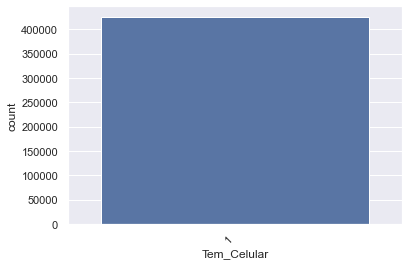

In [28]:
sns.countplot(x = "Tem_Celular", data = df_clientes_cadastrados_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()
#todos os clientes têm celular

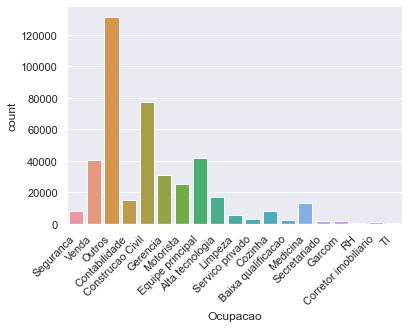

In [29]:
sns.countplot(x = "Ocupacao", data = df_clientes_cadastrados_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()
#a maior barra é de Outros
#hipóteses: várias profissões estão contidas nessa categoria, ou apenas uma como "Educação", que não está disponível no dataset
#para isso vamos verificar a renda dessa coluna

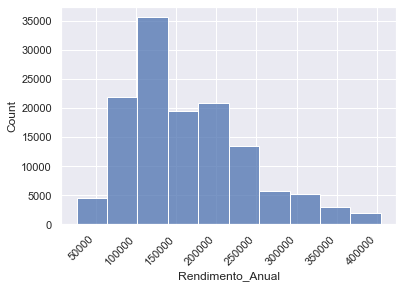

In [30]:
sns.histplot(data=df_clientes_cadastrados_sem_outliers.query("Ocupacao == 'Outros'"), x="Rendimento_Anual", bins=10)
plt.xticks(rotation=45, ha='right')
plt.show()
#a renda da categoria Outros é bem distribuída, aparentemente há várias Ocupações nessa categoria que não estão listadas no dataset

In [31]:
df_clientes_cadastrados_sem_outliers.shape

(425822, 18)

In [32]:
#como todos os clientes têm celular, vamos remover a coluna Tem_Celular
df_clientes_cadastrados_sem_outliers_tratamento1 = df_clientes_cadastrados_sem_outliers.drop("Tem_Celular", axis=1)
df_clientes_cadastrados_sem_outliers_tratamento1.shape

(425822, 17)

In [33]:
#Por lei deveremos desconsiderar os seguintes dados sensíveis, que não podem ser considerados na hora de aprovar o crédito:
#Origem social e étnica
#Condições de Saúde
#Informação Genética
#Orientação Sexual
#Convicções políticas, religiosas e filosóficas

#Portando, vamos retirar a coluna Gênero
df_clientes_cadastrados_sem_outliers_tratamento1 = df_clientes_cadastrados_sem_outliers_tratamento1.drop("Genero", axis=1)
df_clientes_cadastrados_sem_outliers_tratamento1.shape

(425822, 16)

In [34]:
df_clientes_cadastrados_sem_outliers_tratamento1.shape

(425822, 16)

In [35]:
colunas_categoricas.remove("Genero")
colunas_categoricas.remove("Tem_Celular")
colunas_categoricas

['Tem_Carro',
 'Tem_Casa_Propria',
 'Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email',
 'Ocupacao']

## Desafio 02: Criar uma função para gerar novos gráficos

## Desafio 03: Continuar a análise exploratória dos dados

# Aula 03 *********************************************************

In [37]:
df_clientes_aprovados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_aprovados.csv')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [38]:
df_clientes_aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [45]:
#neste dataset o mesmo cliente está em mais de uma linha
#vamos ver a quantidade de clientes aprovados
df_clientes_aprovados.ID_Cliente.value_counts().shape

(45985,)

In [42]:
#vamos comparar com a quantidade de clientes cadastrados no dataset de clientes cadastrados
df_clientes_cadastrados_sem_outliers_tratamento1.shape

(425822, 16)

In [46]:
#vamos olhar alguns clientes aprovados
df_clientes_aprovados.query("ID_Cliente == 5001712")

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


In [47]:
df_clientes_aprovados.query("ID_Cliente == 5001711")

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


In [48]:
#vamos verificar quantas faixas de atraso há no dataset de clientes aprovados
df_clientes_aprovados.Faixa_atraso.value_counts().index.to_list()

['pagamento realizado',
 '1-29 dias',
 'nenhum empréstimo',
 '30-59 dias',
 '>150 dias',
 '60-89 dias',
 '90-119 dias',
 '120-149 dias']

### como é calculado a abertura de crédito ?

### Criamos uma variavel para guardar os dados da váriavel df_registros_creditos agrupados por ID_Cliente, vamos dar o nome de df_registros_creditos_agrupados_ID, para agrupar usamos o método groupby.

### Depois vamos utilizar o método apply para iterar por cada ID_Cliente, e vamos utilizar o lambda para criar uma lógica, e essa lógica vai ser aplicada em X, mas o que é X ? X vai ser um DataFrame composto apenas por linhas de um ID por vez, a logíca que vai ser aplicada é calcular, através da função min, o menor valor da coluna Mes_referencia.

### o retorno dessa função apply vai uma Serie de tamanho igual a quantidade de clientes que temos e vai guardar o menor valor Mes_referencia de cada cliente, vamos salvar isso na váriavel ser_abertura.

In [50]:
df_registros_creditos_agrupados_ID = df_clientes_aprovados.groupby('ID_Cliente')
ser_abertura = df_registros_creditos_agrupados_ID.apply(lambda x: min(x['Mes_referencia']))
ser_abertura.name = 'Abertura'
ser_abertura

ID_Cliente
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: Abertura, Length: 45985, dtype: int64

In [51]:
df_clientes_aprovados = df_clientes_aprovados.merge(ser_abertura, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


### como é calculado o ultimo mês do crédito ?

### Novamente usamos a váriavel df_registros_creditos_agrupados_ID.

### Depois vamos utilizar o método apply para iterar por cada ID_Cliente, e vamos utilizar o lambda para criar uma lógica, e essa lógica vai ser aplicada em X, mas o que é X ? X vai ser um DataFrame composto apenas por linhas de um ID por vez, a logíca que vai ser aplicada é calcular, através da função max, o maior valor da coluna Mes_referencia.

### o retorno dessa função apply vai uma Serie de tamanho igual a quantidade de clientes que temos e vai guardar o maior valor Mes_referencia de cada cliente, vamos salvar isso na váriavel ser_final.

In [52]:
ser_final = df_registros_creditos_agrupados_ID.apply(lambda x: max(x['Mes_referencia']))
ser_final.name = 'Final'
ser_final

ID_Cliente
5001711     0
5001712     0
5001713     0
5001714     0
5001715     0
           ..
5150482   -11
5150483     0
5150484     0
5150485     0
5150487     0
Name: Final, Length: 45985, dtype: int64

In [53]:
df_clientes_aprovados = df_clientes_aprovados.merge(ser_final, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [54]:
df_clientes_aprovados['Janela'] = df_clientes_aprovados['Final'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


In [55]:
#MOB (Month of Book): Along the columns, we use a dimension known as month on book (MOB). MOB is the number of months since 
#our vintages acquisition point. ... In our model, each rate is based on the cumulative number of customers who activated 
#over the total number of customers acquired in that vintage month.
#referência: https://charting-ahead.corsairs.network/vintage-analysis-a-visual-primer-490eff0dcb5a
df_clientes_aprovados['MOB'] = df_clientes_aprovados['Mes_referencia'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


In [56]:
#transformar a coluna Faixa_atraso em numérica
dict_faixa_atraso_ind ={'nenhum empréstimo': 0, 'pagamento realizado': 1,
                        '1-29 dias': 2, '30-59 dias': 3, '60-89 dias': 4,
                        '90-119 dias': 5, '120-149 dias': 6, '>150 dias': 7}
                        
df_clientes_aprovados['Ind_Faixa_atraso'] = df_clientes_aprovados['Faixa_atraso'].map(dict_faixa_atraso_ind)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


### como é definido a coluna Mau para atrasos maiores que 60 dias ?

### Vamos utilizar o método apply para iterar por cada linha do dataframe df_registros_creditos, e vamos utilizar o lambda para criar uma lógica, e essa lógica vai ser aplicada em X, mas o que é X ? X vai ser um DataFrame composto apenas por uma linha de registro, a logíca que vai ser aplicada é um if que se a coluna Ind_Faixa_atraso tiver o valor maior que 3, indicando que existe um atraso maior que 60 dias ,retorna 1 e 0 caso o contrario.

### o retorno dessa função apply vai uma Serie e vai guardar 1 representando que aquele cliente foi um mau pagador naquele periodo ou 0 caso o cliente não tenha sido o mau pagador, vamos salvar estes valores em uma nova coluna chamada Mau.

In [57]:
df_clientes_aprovados['Mau'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] > 3 else 0, axis=1)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0
